<a href="https://colab.research.google.com/github/MichaelTellis/COSMOS_SPARC_project/blob/main/Density_as_a_function_of_Radius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Dark Matter Density Plotter

Galaxy name: CamB
Galaxy Type: Im
CamB_Radius = [0.08, 0.285, 0.49, 0.6499999999999999, 0.815, 0.98, 1.1400000000000001, 1.345, 1.63]
CamB_Total_Mass_Density = [ 8336309.91823612  7457618.90217136  8022151.78883359 10609007.33216278
 10588843.00570394 12782819.25254968 13285372.58059741 10331210.86670459
  9736765.01195754]
CamB_Visible_Mass_Density = [36885345.32419008 34363572.29291243 25691843.25102603 30521634.91669618
 21562099.13108929 21656568.91228202 15864671.11853231 11234329.82808527
  4206693.7789728 ]
CamB_Dark_Matter_Density = [-28549035.40595396 -26905953.39074107 -17669691.46219244
 -19912627.5845334  -10973256.12538535  -8873749.65973234
  -2579298.5379349    -903118.96138068   5530071.23298475]
Galaxy name: D631-7
Galaxy Type: Im
D631-7_Radius = [0.225, 0.675, 1.125, 1.5750000000000002, 2.025, 2.4699999999999998, 2.915, 3.365, 3.815, 4.265000000000001, 4.715, 5.165, 5.615, 6.0649999999999995, 6.515000000000001, 6.965]
D631-7_Total_Mass_Density = [18822383.96538397 214

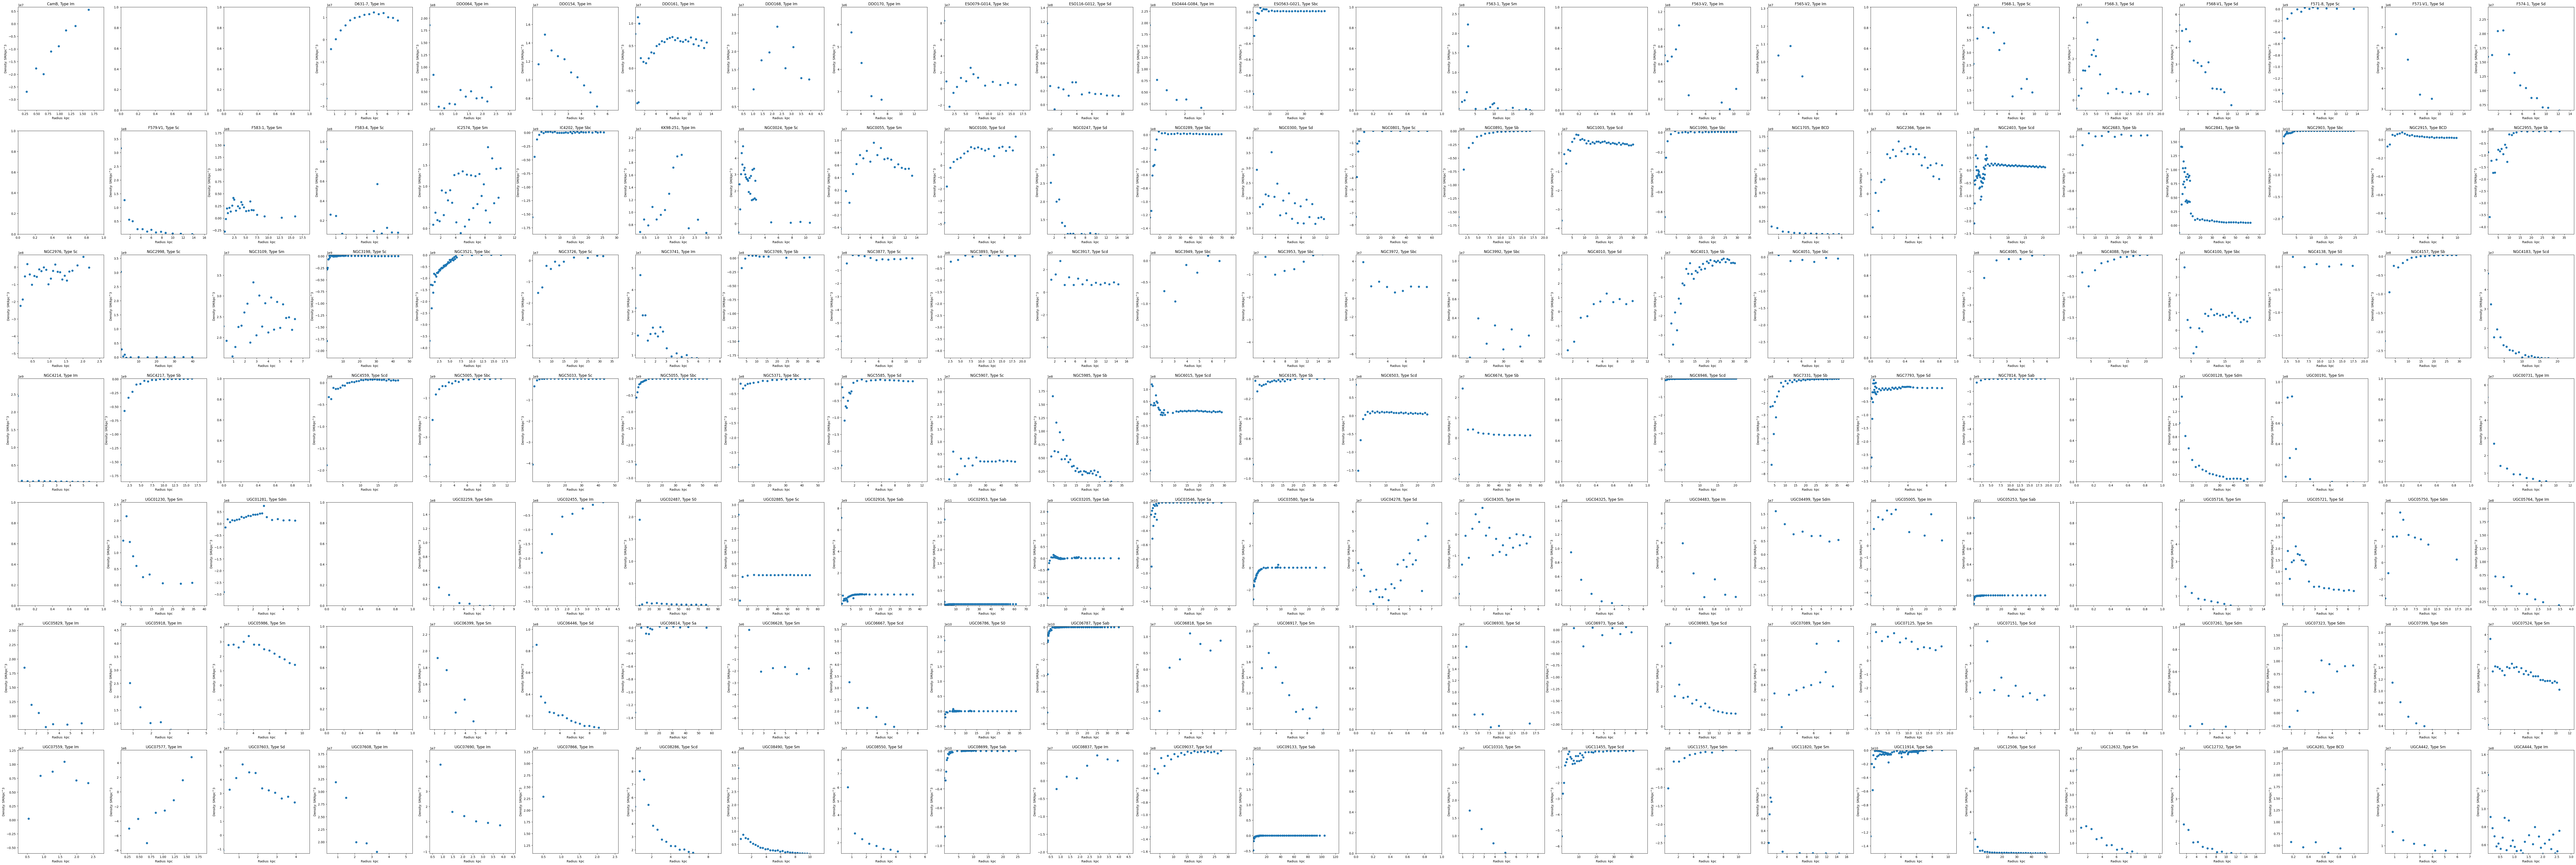

In [40]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


#Upload the summary file and name it as: galaxy_sample_summary.txt
#Also have everyone single SPARC data uploaded

# Constants
GNewton = 4.43e-6  # kpc (km/s)^2 / solar mass

# Summary file and column names
SUMMARY_FILE = "galaxy_sample_summary.txt"
COLUMN_NAMES = ["Galaxy Name", "Hubble Type (1)", "Distance Mpc", "Mean error on D Mpc",
"Distance Method (2)", "Inclination deg", "Mean error on Inc deg", "Total Luminosity at [3.6]_10+9solLum",
"Mean error on L[3.6]_10+9solLum", "Effective Radius at [3.6] kpc", "Effective Surface Brightness at [3.6]_solLum/pc2",
"Disk Scale Length at [3.6]_kpc", "Disk Central Surface Brightness at [3.6]_solLum/pc2", "Total HI mass_10+9solMass",
"HI radius at 1 Msun/pc2_kpc", "Asymptotically Flat Rotation Velocity km/s", "Mean error on Vflat km/s", "Quality Flag (3)",
"References for HI and Ha data (4)"]
COLSPECS = [(0, 11), (12, 14), (14, 20), (20, 25), (25, 27), (27, 31), (31, 35), (35, 42), (42, 49), (49, 54), (54, 62), (62, 67), (67, 75), (75, 82), (82, 87), (87, 92), (92, 97), (97, 100), (100, 114)]

# Read the summary file
summary_df = pd.read_fwf("SPARC_data/" + SUMMARY_FILE, header=None, names=COLUMN_NAMES, colspecs=COLSPECS)
galaxy_names = summary_df[COLUMN_NAMES[0]].tolist()
galaxy_types = summary_df[COLUMN_NAMES[1]].tolist()


# Function to calculate densities
def calculate_densities(R, V_obs, V_visible):
	V_shell = [(4./3) * np.pi * R[0]**3]
	M_shell = [R[0] * V_obs[0]**2 / GNewton]
	M_vis_shell = [R[0] * V_visible[0]**2 / GNewton]
	R_midpt = [0.5 * R[0]]

	for i in range(1, len(R)):
		V_shell.append((4./3) * np.pi * (R[i]**3 - R[i-1]**3))
		M_shell.append(R[i] * V_obs[i]**2 / GNewton - M_shell[i-1])
		M_vis_shell.append(R[i] * V_visible[i]**2 / GNewton - M_vis_shell[i-1])
		R_midpt.append(0.5 * (R[i] + R[i-1]))

	density = np.array(M_shell) / np.array(V_shell)
	vis_density = np.array(M_vis_shell) / np.array(V_shell)
	dark_matter_density = density - vis_density

	return R_midpt, density, vis_density, dark_matter_density

# Initialize dictionary to store formatted data
formatted_data = {}
#set hubble types
HUBBLE_TYPE = {"0":"S0","1":"Sa","2":"Sab","3":"Sb", "4":"Sbc", "5":"Sc",
 "6":"Scd", "7":"Sd", "8":"Sdm", "9":"Sm", "10":"Im", "11":"BCD"}
# Loop over each galaxy
fig,axs = plt.subplots(7,25,figsize=(150,50))
galaxy_val = 0
for i in range(7):
	for j in range(25):
		galaxy_name=galaxy_names[galaxy_val] 
		galaxy_type=galaxy_types[galaxy_val]
		galaxy_file = "SPARC_data/" + galaxy_name + "_rotmod.dat"
		R, V_obs, error_V_obs, V_gas, V_disk, V_bulge, SB_disk, SB_bulge = np.loadtxt(galaxy_file, unpack=True)

		V_visible = np.sqrt(V_gas**2 + V_disk**2 + V_bulge**2)
		R_midpt, density, vis_density, dark_matter_density = calculate_densities(R, V_obs, V_visible)
	
         #prunes low data points
		if len(R)>6:
		    # Store formatted data
			formatted_data[f"{galaxy_name}_Radius"] = R_midpt
			formatted_data[f"{galaxy_name}_Total_Mass_Density"] = density
			formatted_data[f"{galaxy_name}_Visible_Mass_Density"] = vis_density
			formatted_data[f"{galaxy_name}_Dark_Matter_Density"] = dark_matter_density
			#print out and plot data
			for k in range(len(R_midpt)):
				R_midpt[k] = R_midpt[k].item()
			print(f"Galaxy name: {galaxy_name}")
			print(f"Galaxy Type: {HUBBLE_TYPE[str(galaxy_type)]}")
			print(f"{galaxy_name}_Radius = {R_midpt}")
			print(f"{galaxy_name}_Total_Mass_Density = {density}")
			print(f"{galaxy_name}_Visible_Mass_Density = {vis_density}")
			print(f"{galaxy_name}_Dark_Matter_Density = {dark_matter_density}")
			axs[i,j].scatter(formatted_data[galaxy_name + "_Radius"], formatted_data[galaxy_name + "_Dark_Matter_Density"], label = "DM density")
			axs[i,j].set_title(f"{galaxy_name}, Type {HUBBLE_TYPE[str(galaxy_type)]}")
			axs[i,j].set_xlabel("Radius: kpc")
			axs[i,j].set_ylabel("Density: SM/kpc^3")
			axs[i,j].set_ylim(1.2*np.min(dark_matter_density), 1.2*np.max(dark_matter_density))
			axs[i,j].set_xlim(1.2*np.min(R_midpt), 1.2*np.max(R_midpt))
		galaxy_val+=1
'''

		
  #graphy graphy
		plt.plot(formatted_df["CamB_Radius"], formatted_df["CamB_Dark_Matter_Density"], label= "Density", color= "chartreuse")
		plt.legend()
		plt.title("Dark Matter Density vs Radius")
		plt.axis

	else:
		print(f"{galaxy_file} not found, skipping this galaxy.")
'''



# Convert the formatted data to a pandas DataFrame for better organization
formatted_df = pd.DataFrame.from_dict(formatted_data, orient='index').transpose()

# Save the DataFrame to a TSV file for further analysis
formatted_df.to_csv("galaxy_densities.tsv", sep='\t', index=False)
print(formatted_df)


plt.savefig("DM_density_plots.pdf")
plt.show()
		   
				 
